In [1]:
#!pip install -q ultralytics PyYAML

In [22]:
import datetime
import shutil
from pathlib import Path
from collections import Counter

import yaml
import numpy as np
import pandas as pd
from ultralytics import YOLO
from sklearn.model_selection import KFold
import glob, os
from PIL import Image

In [26]:
import os
import glob
import shutil

TARGET_IMAGES_PATH = 'C:/Users/User/OneDrive/Desktop/Identification-Detection/YOLO_Fruit_Detection/archive/Fruits-detection/full_dataset/images/'
TARGET_LABELS_PATH = 'C:/Users/User/OneDrive/Desktop/Identification-Detection/YOLO_Fruit_Detection/archive/Fruits-detection/full_dataset/labels/'

source_folder_path = "C:/Users/User/OneDrive/Desktop/Identification-Detection/YOLO_Fruit_Detection/archive/Fruits-detection/{split}/{type}"
splits = ["train", "valid"]
types = ["images/*.jpg", "labels/*.txt"]

os.makedirs(TARGET_IMAGES_PATH, exist_ok=True)
os.makedirs(TARGET_LABELS_PATH, exist_ok=True)

image_paths = list()
label_paths = list()

for split in splits:
    for data_type in types:
        files = glob.glob(source_folder_path.format(split=split, type=data_type))
        for file_ in files:
            if "image" in data_type:
                shutil.copy(file_, TARGET_IMAGES_PATH)
            else:
                shutil.copy(file_, TARGET_LABELS_PATH)

image_paths = glob.glob(TARGET_IMAGES_PATH + "*.jpg")
label_paths = glob.glob(TARGET_LABELS_PATH + "*.txt")

In [5]:
label_paths

['C:/Users/User/OneDrive/Desktop/archive/Fruits-detection/full_dataset/labels\\0000a16e4b057580_jpg.rf.00ab48988370f64f5ca8ea43ff64beab.txt',
 'C:/Users/User/OneDrive/Desktop/archive/Fruits-detection/full_dataset/labels\\0000a16e4b057580_jpg.rf.7e6dce029fb67f01eb19aa730a5d5c2e.txt',
 'C:/Users/User/OneDrive/Desktop/archive/Fruits-detection/full_dataset/labels\\0000a16e4b057580_jpg.rf.bc4d31cdcbe229dd022957a8ce30a177.txt',
 'C:/Users/User/OneDrive/Desktop/archive/Fruits-detection/full_dataset/labels\\00020ebf74c4881c_jpg.rf.508192a0a97aa6c4a3b6882eab811743.txt',
 'C:/Users/User/OneDrive/Desktop/archive/Fruits-detection/full_dataset/labels\\00020ebf74c4881c_jpg.rf.5af192a2254c8ecc4188a253055df14c.txt',
 'C:/Users/User/OneDrive/Desktop/archive/Fruits-detection/full_dataset/labels\\0009e57c20c24d4a_jpg.rf.de60f71a5b0c71caaa81427798cbfac8.txt',
 'C:/Users/User/OneDrive/Desktop/archive/Fruits-detection/full_dataset/labels\\000d1976fc8ebfe7_jpg.rf.101a196ad8bb2049400327fc662a677e.txt',
 'C:/U

In [28]:
image_paths[1]

'C:/Users/User/OneDrive/Desktop/archive/Fruits-detection/full_dataset/images\\0000a16e4b057580_jpg.rf.7e6dce029fb67f01eb19aa730a5d5c2e.jpg'

In [29]:
dataset_path = Path('C:/Users/User/OneDrive/Desktop/Identification-Detection/YOLO_Fruit_Detection/archive/Fruits-detection/full_dataset/') 
labels = sorted(dataset_path.rglob("labels/*.txt"))

yaml_file = 'C:/Users/User/OneDrive/Desktop/Identification-Detection/YOLO_Fruit_Detection/archive/Fruits-detection/data.yaml' 
with open(yaml_file, 'r', encoding="utf8") as y:
    classes = yaml.safe_load(y)['names']
cls_idx = list(range(len(classes)))
print(list(zip(classes, cls_idx)))

[('Apple', 0), ('Banana', 1), ('Grape', 2), ('Orange', 3), ('Pineapple', 4), ('Watermelon', 5)]


In [30]:
labels

[WindowsPath('C:/Users/User/OneDrive/Desktop/archive/Fruits-detection/full_dataset/labels/0000a16e4b057580_jpg.rf.00ab48988370f64f5ca8ea43ff64beab.txt'),
 WindowsPath('C:/Users/User/OneDrive/Desktop/archive/Fruits-detection/full_dataset/labels/0000a16e4b057580_jpg.rf.7e6dce029fb67f01eb19aa730a5d5c2e.txt'),
 WindowsPath('C:/Users/User/OneDrive/Desktop/archive/Fruits-detection/full_dataset/labels/0000a16e4b057580_jpg.rf.bc4d31cdcbe229dd022957a8ce30a177.txt'),
 WindowsPath('C:/Users/User/OneDrive/Desktop/archive/Fruits-detection/full_dataset/labels/00020ebf74c4881c_jpg.rf.508192a0a97aa6c4a3b6882eab811743.txt'),
 WindowsPath('C:/Users/User/OneDrive/Desktop/archive/Fruits-detection/full_dataset/labels/00020ebf74c4881c_jpg.rf.5af192a2254c8ecc4188a253055df14c.txt'),
 WindowsPath('C:/Users/User/OneDrive/Desktop/archive/Fruits-detection/full_dataset/labels/0009e57c20c24d4a_jpg.rf.de60f71a5b0c71caaa81427798cbfac8.txt'),
 WindowsPath('C:/Users/User/OneDrive/Desktop/archive/Fruits-detection/full_d

In [31]:
indx = [l.stem for l in labels]
labels_df = pd.DataFrame([], columns=cls_idx, index=indx)

In [32]:
for label in labels:
    lbl_counter = Counter()

    with open(label,'r') as lf:
        lines = lf.readlines()

    for l in lines:
        lbl_counter[int(l.split(' ')[0])] += 1

    labels_df.loc[label.stem] = lbl_counter

labels_df = labels_df.fillna(0.0)
labels_df


,0,1,2,3,4,5
0000a16e4b057580_jpg.rf.00ab48988370f64f5ca8ea43ff64beab,0.0,0.0,0.0,0.0,0.0,7.0
0000a16e4b057580_jpg.rf.7e6dce029fb67f01eb19aa730a5d5c2e,0.0,0.0,0.0,0.0,0.0,7.0
0000a16e4b057580_jpg.rf.bc4d31cdcbe229dd022957a8ce30a177,0.0,0.0,0.0,0.0,0.0,7.0
00020ebf74c4881c_jpg.rf.508192a0a97aa6c4a3b6882eab811743,0.0,0.0,0.0,1.0,0.0,0.0
00020ebf74c4881c_jpg.rf.5af192a2254c8ecc4188a253055df14c,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
ff4cd45896de38be_jpg.rf.c4b5e967ca10c7ced3b9e977d245bda0,0.0,0.0,0.0,0.0,0.0,2.0
ff4cd45896de38be_jpg.rf.ea4c1d37d2884b3e3cbce0860d2c739b,0.0,0.0,0.0,0.0,0.0,2.0
ff5fd9c3c624b7dc_jpg.rf.bb519feaa36fc4bf630a033e09d8b1df,1.0,0.0,0.0,0.0,0.0,0.0
ff5fd9c3c624b7dc_jpg.rf.f0751c9c3aa4519ea3c9d6a8c978a88a,1.0,0.0,0.0,0.0,0.0,0.0


In [33]:
ksplit = 3
kf = KFold(n_splits=ksplit, shuffle=True, random_state=20)

kfolds = list(kf.split(labels_df))

In [34]:
folds = [f'split_{n}' for n in range(1, ksplit + 1)]
fold_lbl_distrb = pd.DataFrame(index=folds, columns=cls_idx)

for n, (train_indices, val_indices) in enumerate(kfolds, start=1):
    train_totals = labels_df.iloc[train_indices].sum()
    val_totals = labels_df.iloc[val_indices].sum()

    ratio = val_totals / (train_totals + 1E-7)
    fold_lbl_distrb.loc[f'split_{n}'] = ratio

In [35]:
fold_lbl_distrb

,0,1,2,3,4,5
split_1,0.529778,0.477802,0.534111,0.479099,0.516899,0.50079
split_2,0.511288,0.428814,0.474547,0.537785,0.465898,0.633706
split_3,0.460657,0.604008,0.492576,0.484501,0.518408,0.38585


In [36]:
image_paths[1]

'C:/Users/User/OneDrive/Desktop/archive/Fruits-detection/full_dataset/images\\0000a16e4b057580_jpg.rf.7e6dce029fb67f01eb19aa730a5d5c2e.jpg'

In [48]:
kfold_base_path = Path('C:/Users/User/OneDrive/Desktop/Identification-Detection/YOLO_Fruit_Detection/archive/Fruits-detection/kfold')
shutil.rmtree(kfold_base_path) if kfold_base_path.is_dir() else None
os.makedirs(str(kfold_base_path))
yaml_paths = list()
train_txt_paths = list()
val_txt_paths = list()
for i, (train_idx, val_idx) in enumerate(kfolds):
    
    train_paths = [image_paths[j] for j in train_idx]
    val_paths = [image_paths[j] for j in val_idx]
    
    train_txt = kfold_base_path / f"train_{i}.txt"
    val_txt =  kfold_base_path / f"val_{i}.txt"

    with open(str(train_txt), 'w') as f:
        f.writelines(s + '\n' for s in train_paths)
    with open(str(val_txt), 'w') as f:
        f.writelines(s + '\n' for s in val_paths)

    train_txt_paths.append(str(train_txt))
    val_txt_paths.append(str(val_txt))

    yaml_path = kfold_base_path / f'data_{i}.yaml'
    with open(yaml_path, 'w') as ds_y:
        yaml.safe_dump({
            'train': str(train_txt.name),
            'val': str(val_txt.name),
            'names': classes
        }, ds_y)
    yaml_paths.append(str(yaml_path))
print("Yaml Paths")
print(yaml_paths)

Yaml Paths
['C:\\Users\\User\\OneDrive\\Desktop\\archive\\Fruits-detection\\kfold\\data_0.yaml', 'C:\\Users\\User\\OneDrive\\Desktop\\archive\\Fruits-detection\\kfold\\data_1.yaml', 'C:\\Users\\User\\OneDrive\\Desktop\\archive\\Fruits-detection\\kfold\\data_2.yaml']


In [49]:
print("data_0.yaml File: \n")
!cat fruit-detection/kfold/data_0.yaml

print("\ntrain_0.txt first two lines: \n")
!cat fruit-detection/kfold/train_0.txt | head -n 2

data_0.yaml File: 


train_0.txt first two lines: 



'cat' n’est pas reconnu en tant que commande interne
ou externe, un programme exécutable ou un fichier de commandes.
'cat' n’est pas reconnu en tant que commande interne
ou externe, un programme exécutable ou un fichier de commandes.


In [50]:
print("data_0.yaml File: \n")
with open('C:/Users/User/OneDrive/Desktop/Identification-Detection/YOLO_Fruit_Detection/archive/Fruits-detection/kfold/data_0.yaml', 'r') as file:
    print(file.read())

print("\ntrain_0.txt first two lines: \n")
with open('C:/Users/User/OneDrive/Desktop/Identification-Detection/YOLO_Fruit_Detection/archive/Fruits-detection/kfold/train_0.txt', 'r') as file:
    for _ in range(2):
        print(file.readline(), end='')

data_0.yaml File: 

names:
- Apple
- Banana
- Grape
- Orange
- Pineapple
- Watermelon
train: train_0.txt
val: val_0.txt


train_0.txt first two lines: 

C:/Users/User/OneDrive/Desktop/archive/Fruits-detection/full_dataset/images\0000a16e4b057580_jpg.rf.7e6dce029fb67f01eb19aa730a5d5c2e.jpg
C:/Users/User/OneDrive/Desktop/archive/Fruits-detection/full_dataset/images\0000a16e4b057580_jpg.rf.bc4d31cdcbe229dd022957a8ce30a177.jpg


In [51]:
save_path = Path('kfold_records')
os.makedirs(str(save_path), exist_ok=True)
fold_lbl_distrb.to_csv(save_path / "kfold_label_distribution.csv")

In [53]:
from IPython.display import clear_output
import time
os.environ['WANDB_DISABLED'] = 'true'

batch = 16
project = 'kfold_demo'
epochs = 1

results = list()

for i in range(ksplit):
    model = YOLO('yolov8s.pt')
    dataset_yaml = yaml_paths[i]
    print(f"Training for fold={i} using {dataset_yaml}")
    model.train(data=dataset_yaml, batch=batch, project=project, epochs=epochs, verbose=False, workers=28)
    result = model.metrics
    results.append(result)
    clear_output()

In [54]:
metric_values = dict()

for result in results:
    for metric, metric_val in result.results_dict.items():
        if metric not in metric_values:
            metric_values[metric] = []
        metric_values[metric].append(metric_val)

metric_df = pd.DataFrame.from_dict(metric_values)
visualize_metric = ['mean', 'std', 'min', 'max']
metric_df.describe().loc[visualize_metric]

,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),fitness
mean,0.459169,0.380574,0.366041,0.266427,0.276388
std,0.038602,0.023565,0.020313,0.015156,0.015658
min,0.421319,0.358328,0.343838,0.250676,0.259992
max,0.498481,0.405268,0.383693,0.280908,0.291186


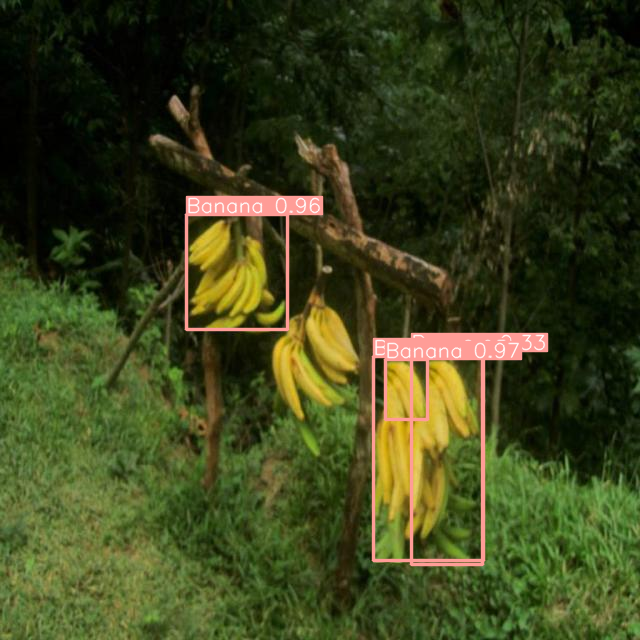

In [59]:
pred = model(image_paths[100])
img_arr = pred[0].plot()
im = Image.fromarray(img_arr[..., ::-1])
im